In [1]:
import pandas as pd
import numpy as np


In [2]:
train_data_file= 'train.csv'
train_df= pd.read_csv(train_data_file)

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df_cat = train_df.select_dtypes(include = 'O')
category_variables= list(df_cat.columns)

for col in category_variables:
    print(list(train_df[col].unique()))

['RL', 'RM', 'C (all)', 'FV', 'RH']
['Pave', 'Grvl']
[nan, 'Grvl', 'Pave']
['Reg', 'IR1', 'IR2', 'IR3']
['Lvl', 'Bnk', 'Low', 'HLS']
['AllPub', 'NoSeWa']
['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
['Gtl', 'Mod', 'Sev']
['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']
['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']
['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe']
['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs']
['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin']
['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed']
['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv', 'Roll', 'ClyTile']
['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing', 'CemntBd', 'Plywood', 'AsbShng', '

In [7]:
null_perc= train_df.isnull().sum()/train_df.shape[0]*100
null_perc[null_perc>0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [8]:
train_df.shape

(1460, 81)

In [9]:
drop_col= null_perc[null_perc>50].index
drop_col= list(drop_col)
train_df.drop(drop_col, axis=1,inplace= True)

df_cat = train_df.select_dtypes(include = 'O')
category_variables= list(df_cat.columns)

df_num = train_df.select_dtypes(include = ['float64','int64'])
num_variables= list(df_num.columns)

In [10]:
train_df.shape

(1460, 76)

In [11]:
null_perc= train_df.isnull().sum()/train_df.shape[0]*100
null_perc[null_perc>0]

LotFrontage     17.739726
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [12]:
for col in category_variables:
    replace_value = train_df[col].mode()
    train_df[col].fillna('None',inplace=True)

In [13]:
null_perc= train_df.isnull().sum()/train_df.shape[0]*100
null_perc[null_perc>0]

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

In [14]:
for col2 in num_variables:
    replace_value = train_df[col2].mean()
    train_df[col2].fillna(replace_value, inplace= True)

In [15]:
null_perc= train_df.isnull().sum()/train_df.shape[0]*100
null_perc[null_perc>0]

Series([], dtype: float64)

In [16]:
for col in train_df.columns:
    print(list(train_df[col].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [18]:
null_perc= train_df.isnull().sum()/train_df.shape[0]*100
null_perc[null_perc>50]

Series([], dtype: float64)

In [19]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Visualization of Data

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
print(train_df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


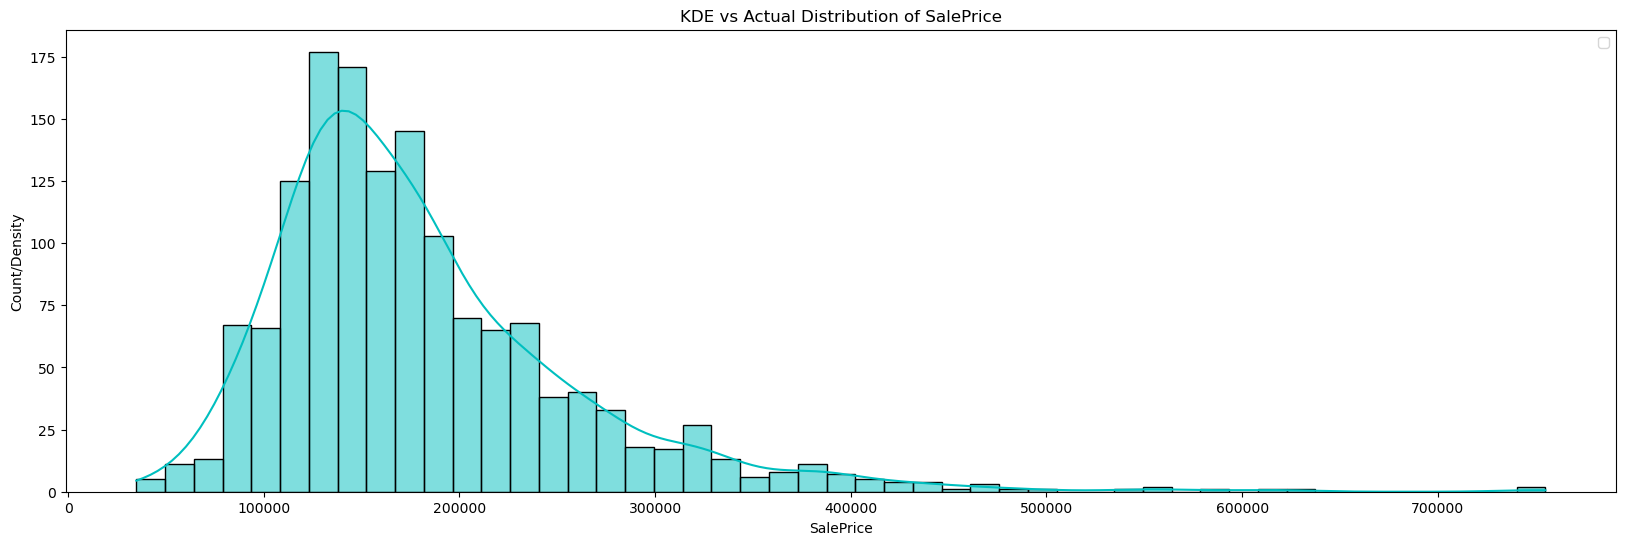

In [22]:
plt.figure(figsize=(20,6))
sns.histplot(train_df['SalePrice'], color= 'c', kde=True )
plt.xlabel('SalePrice')
plt.ylabel('Count/Density')
plt.title(f'KDE vs Actual Distribution of SalePrice')
plt.legend()
plt.show();

In [23]:
list(set(train_df.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [24]:
df_num = train_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

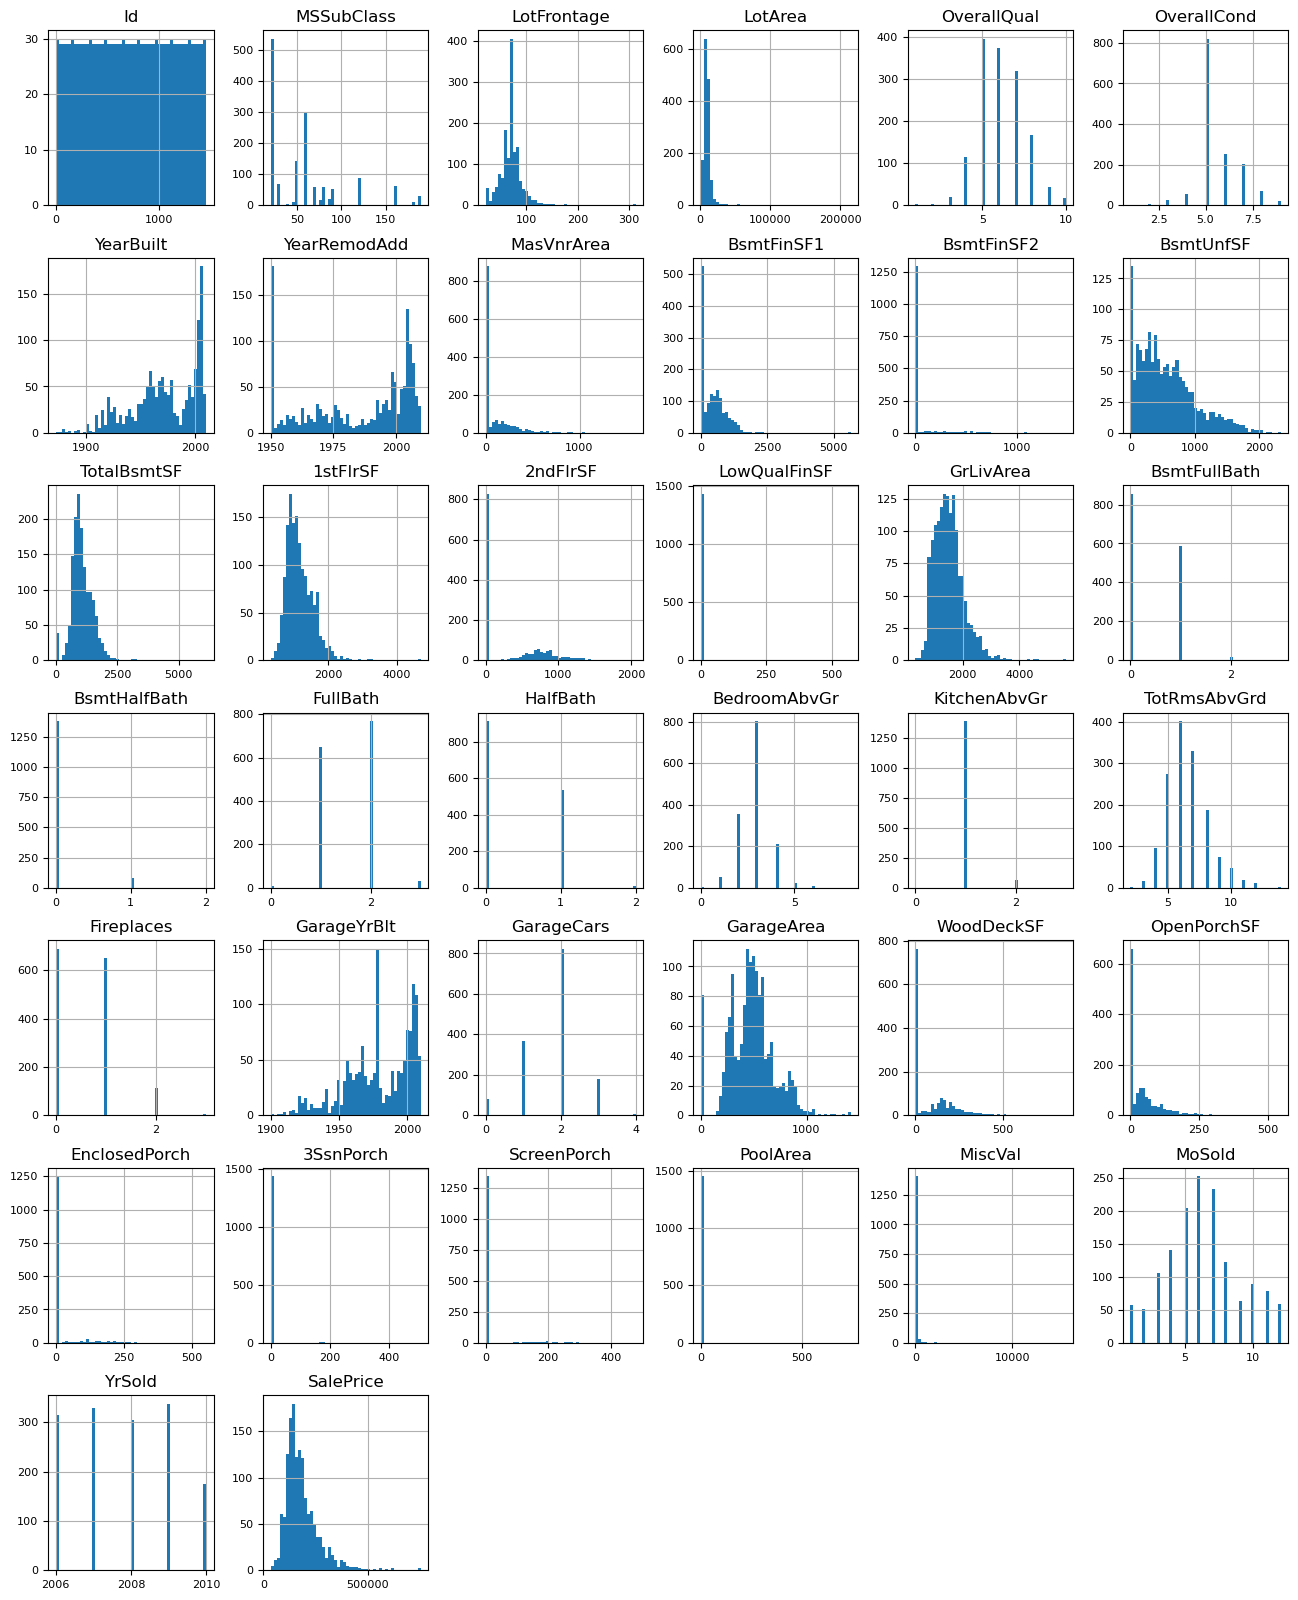

In [25]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [26]:
train_df.shape

(1460, 76)

In [27]:
train_df.drop('Id',axis=1,inplace=True)

In [28]:
train_df.shape

(1460, 75)

### Modelling

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
! pip install xgboost
from xgboost import XGBRegressor

In [30]:
encoder=LabelEncoder()
for column in category_variables:
    train_df[column]=encoder.fit_transform(train_df[column])

In [31]:
x=train_df.drop('SalePrice',axis=1).values
y=train_df['SalePrice'].values

In [32]:
for i in x:
    print(set(i))

{0.0, 1.0, 8450.0, 3.0, 4.0, 5.0, 2.0, 7.0, 6.0, 8.0, 12.0, 13.0, 150.0, 548.0, 1710.0, 60.0, 61.0, 65.0, 706.0, 196.0, 2003.0, 854.0, 856.0, 2008.0}
{9600.0, 1.0, 0.0, 3.0, 2.0, 4.0, 6.0, 5.0, 8.0, 20.0, 24.0, 284.0, 298.0, 1976.0, 460.0, 80.0, 978.0, 2007.0, 1262.0}
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 12.0, 13.0, 920.0, 162.0, 42.0, 434.0, 60.0, 68.0, 2001.0, 2002.0, 2008.0, 608.0, 866.0, 486.0, 11250.0, 1786.0}
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 642.0, 8.0, 13.0, 15.0, 272.0, 540.0, 35.0, 1970.0, 1717.0, 60.0, 961.0, 70.0, 9550.0, 1998.0, 2006.0, 216.0, 756.0, 1915.0}
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 12.0, 13.0, 15.0, 655.0, 2198.0, 1053.0, 14260.0, 60.0, 192.0, 836.0, 2000.0, 84.0, 2008.0, 350.0, 490.0, 1145.0}
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 11.0, 12.0, 13.0, 796.0, 30.0, 14115.0, 40.0, 50.0, 566.0, 700.0, 64.0, 320.0, 1993.0, 1995.0, 1362.0, 85.0, 2009.0, 732.0, 480.0}
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 12.0, 13.0, 20.0,

In [33]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [34]:
x_train,x_val,y_train,y_val=train_test_split(x_scaled,y,test_size=0.1,random_state=42)

In [35]:
parameters = {
    'LinearRegression': {
        'fit_intercept': [True, False],
    },
    'XGBRegressor': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'colsample_bytree': [0.3, 0.7]
    },
    'SVR': {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    },
    'RandomForestRegressor': {
        'n_estimators': [50, 100, 200,300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
}

In [36]:
models={'LinearRegression': LinearRegression(),
       'XGBRegressor': XGBRegressor(objective='reg:squarederror'),
        'SVR': SVR(),
        'RandomForestRegressor': RandomForestRegressor(),
       }

In [37]:
results=[]
for model_name,model in models.items():
    print(f'Grid Searching for {model_name}')
    param_grid=parameters[model_name]
    grid_search=GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(x,y)
    best_model=grid_search.best_estimator_
    best_params=grid_search.best_params_
    best_score=grid_search.best_score_
    results.append({'Model':model_name, 'Best Params':
                   best_params,'Best Score': best_score})
results_data=pd.DataFrame(results)

Grid Searching for LinearRegression
Grid Searching for XGBRegressor


Grid Searching for SVR
Grid Searching for RandomForestRegressor


In [38]:
results_data

,Model,Best Params,Best Score
0,LinearRegression,{'fit_intercept': False},-1.200796e+09
1,XGBRegressor,"{'colsample_bytree': 0.7, 'learning_rate': 0.1...",-6.975045e+08
2,SVR,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",-1.469120e+09
3,RandomForestRegressor,"{'max_depth': 20, 'min_samples_split': 5, 'n_e...",-8.931668e+08


In [39]:
results_data.iloc[1,1]

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 200}

In [40]:
xgb=XGBRegressor(colsample_bytree= 0.7,
 learning_rate= 0.1,
 max_depth= 3,
 n_estimators= 200)

In [41]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
from sklearn.metrics import *
y_pred=xgb.predict(x_val)
mae = mean_absolute_error(y_val, y_pred)
mse=mean_squared_error(y_val,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_val,y_pred)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

MSE: 676864922.4695524
RMSE: 26016.627807414865
MAE: 14594.605334974314
R-squared: 0.9259175214263904


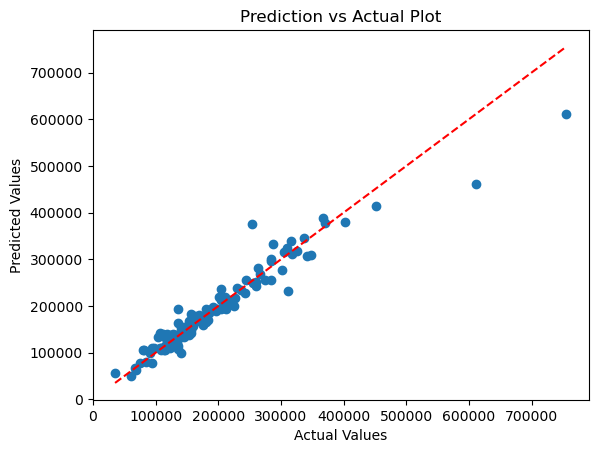

In [43]:
plt.scatter(y_val, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual Plot')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='r', linestyle='--')
plt.show()

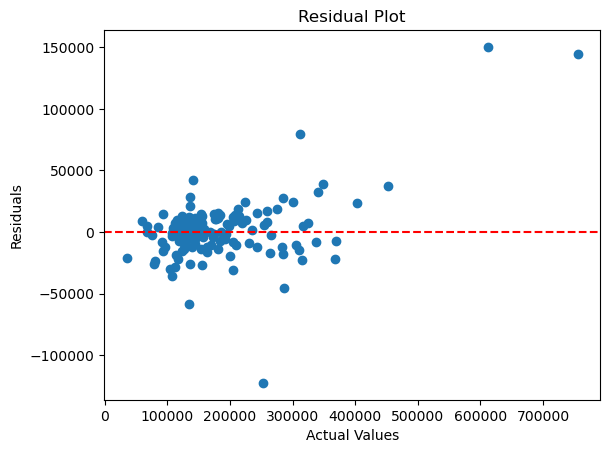

In [44]:
import matplotlib.pyplot as plt

residuals = y_val - y_pred
plt.scatter(y_val, residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [45]:
test_data=pd.read_csv('test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [46]:
columns_with_null_values=[]
for column in test_data.columns:
    if test_data[column].isnull().sum()!=0:
            columns_with_null_values.append(column)
for column in columns_with_null_values:
         print(f"Column {column}: {test_data[column].isnull().sum()} null values/type:",
          test_data[column].dtype)

Column MSZoning: 4 null values/type: object
Column LotFrontage: 227 null values/type: float64
Column Alley: 1352 null values/type: object
Column Utilities: 2 null values/type: object
Column Exterior1st: 1 null values/type: object
Column Exterior2nd: 1 null values/type: object
Column MasVnrType: 894 null values/type: object
Column MasVnrArea: 15 null values/type: float64
Column BsmtQual: 44 null values/type: object
Column BsmtCond: 45 null values/type: object
Column BsmtExposure: 44 null values/type: object
Column BsmtFinType1: 42 null values/type: object
Column BsmtFinSF1: 1 null values/type: float64
Column BsmtFinType2: 42 null values/type: object
Column BsmtFinSF2: 1 null values/type: float64
Column BsmtUnfSF: 1 null values/type: float64
Column TotalBsmtSF: 1 null values/type: float64
Column BsmtFullBath: 2 null values/type: float64
Column BsmtHalfBath: 2 null values/type: float64
Column KitchenQual: 1 null values/type: object
Column Functional: 2 null values/type: object
Column Fire

In [47]:
for column in columns_with_null_values:
        if test_data[column].dtype=='float64':
            test_data[column]=test_data[column].fillna(test_data[column].mean())
        else:
            test_data[column]=test_data[column].fillna(test_data[column].mode()[0])

In [48]:
test_data.duplicated().sum()

0

In [49]:
test_data.drop(drop_col, axis=1,inplace= True)

In [50]:
test_data.shape

(1459, 75)

In [51]:
categorical_data=[col for col in test_data.columns if test_data[col].dtype=='object']
encoder=LabelEncoder()
for column in categorical_data:
    test_data[column]=encoder.fit_transform(test_data[column])

In [52]:
x=test_data.drop('Id',axis=1).values
x_scaled=scaler.fit_transform(x)

In [53]:
y_hat=xgb.predict(x_scaled)

In [54]:
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': y_hat
})

print(submission.head())

     Id      SalePrice
0  1461  144981.859375
1  1462  182086.546875
2  1463  197439.421875
3  1464  183829.875000
4  1465  210345.203125
